In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
exercise = pd.read_csv("exercise.csv")
calories = pd.read_csv("calories.csv")

exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df = pd.merge(exercise, calories, on="User_ID")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


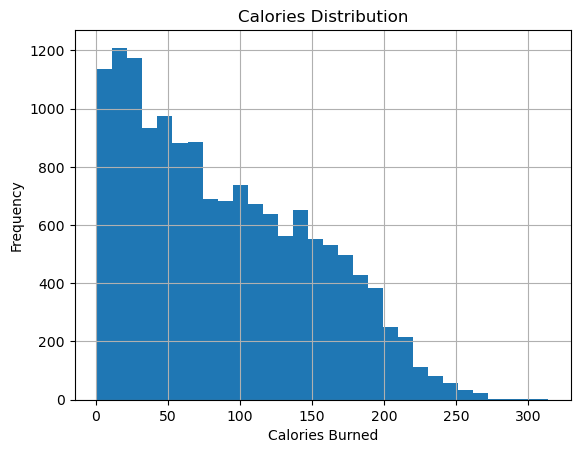

In [5]:
df['Calories'].hist(bins=30)
plt.title("Calories Distribution")
plt.xlabel("Calories Burned")
plt.ylabel("Frequency")
plt.show()

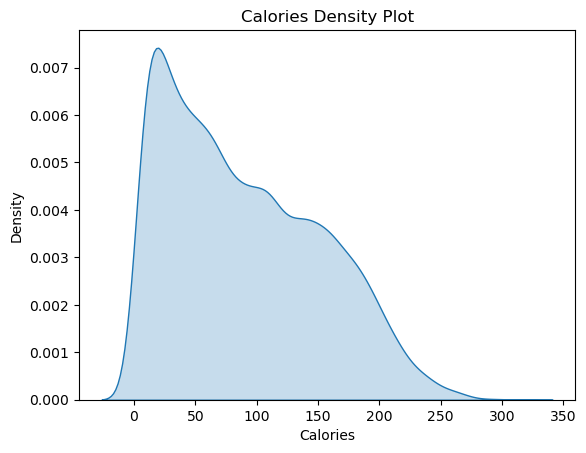

In [6]:
sns.kdeplot(df['Calories'], fill=True)
plt.title("Calories Density Plot")
plt.show()

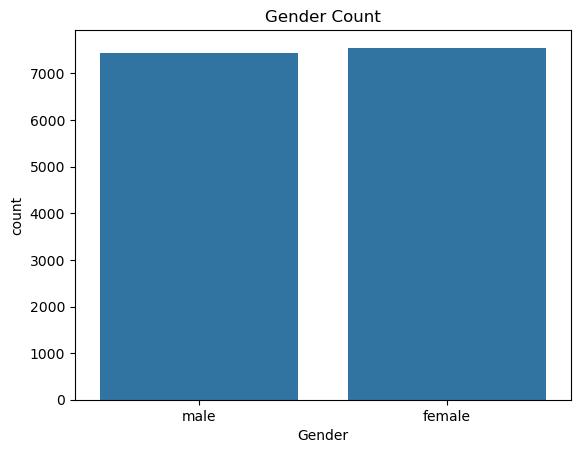

In [7]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Count")
plt.show()

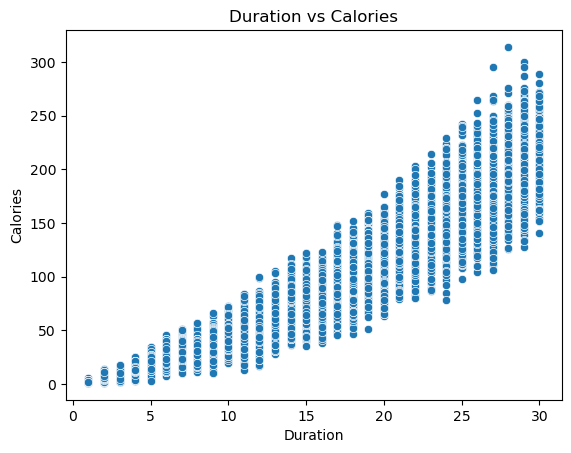

In [8]:
sns.scatterplot(x='Duration', y='Calories', data=df)
plt.title("Duration vs Calories")
plt.show()

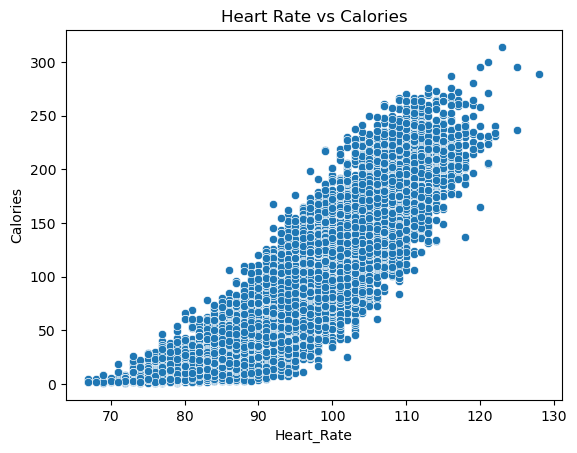

In [9]:
sns.scatterplot(x='Heart_Rate', y='Calories', data=df)
plt.title("Heart Rate vs Calories")
plt.show()

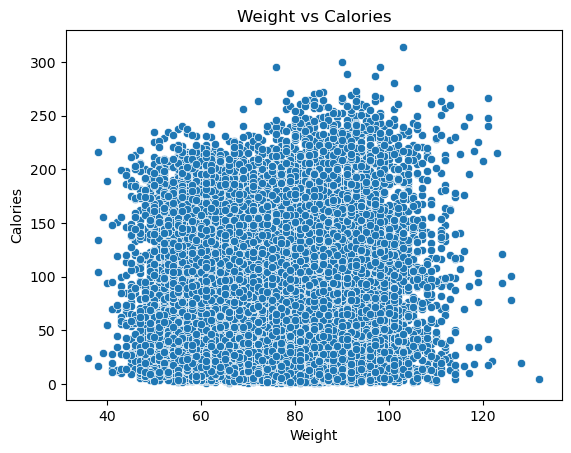

In [10]:
sns.scatterplot(x='Weight', y='Calories', data=df)
plt.title("Weight vs Calories")
plt.show()

In [16]:
df['Temp_Age_Group'] = pd.cut(
    df['Age'],
    bins = [0, 19, 29, 39, 49, 100],
    labels = ["Teen (10-19)", "Young Adult (20-29)", "Adult (30-39)", 
          "Middle Age (40-49)", "Senior (50+)"]

)

df[['Age', 'Temp_Age_Group']].head()


,Age,Temp_Age_Group
0,68,Senior (50+)
1,20,Young Adult (20-29)
2,69,Senior (50+)
3,34,Adult (30-39)
4,27,Young Adult (20-29)


In [17]:
age_counts = df['Temp_Age_Group'].value_counts()
age_counts


Temp_Age_Group
Senior (50+)           5104
Young Adult (20-29)    4387
Adult (30-39)          3115
Middle Age (40-49)     2394
Teen (10-19)              0
Name: count, dtype: int64

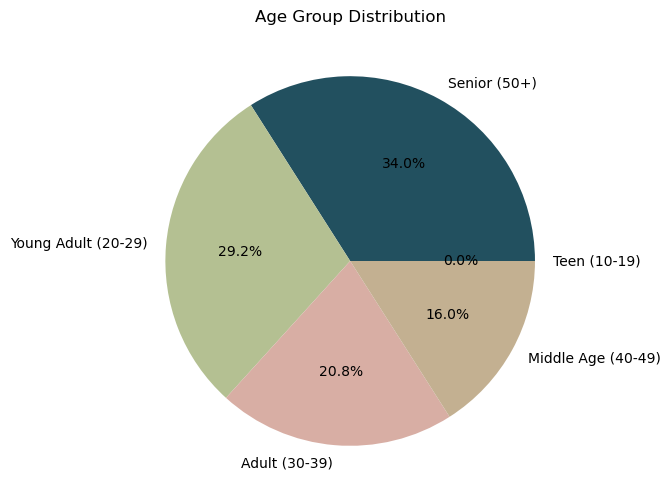

In [20]:
colors = ["#22505f","#b4c092","#d8aea4","#c3b091","#fff9e7"]

plt.figure(figsize=(6,6))

plt.pie(
    age_counts,
    labels=age_counts.index,
    colors=colors,
    autopct='%1.1f%%',

)

plt.title("Age Group Distribution")
plt.show()
